# Creating a prediction of the effect of age on insurance costs

Using insurance.csv, my ultimate goal is to graph a scatter plot and a regression line on the same visual, to make meaningful predictions about how changes in age (x) affect insurance charges (y). 

First I will import all required packages.

I will then read the CSV data with pandas, displaying a sample of a few rows to inspect the columns available in the data, along with the data types and general look and feel of the field values in the dataset. This is important because we must choose two continuous, non-discrete variables in order to be able to fit a regression model.

Next I will create the scatter plot to see if there seems to be any linear relationship between age and insurance costs, ensuring they are both continuous variables in doing so.

Then I will create a simple linear regression model.

I will go on to use the regression model to make predictions about unseen data, with some general commentary on the limitations of this.

I will then plot the scatter plot and the regression line on the same graph. 

Finally, I will display metrics about how accurately my regression line fits the dataset, and make comments on these.


### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


### Reading CSV; displaying column information; displaying a sample of the data

In [2]:
insurance_data = pd.read_csv("insurance.csv")
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
insurance_data.sample(10).sort_index()

,age,sex,bmi,children,smoker,region,charges
57,18,male,31.680,2,yes,southeast,34303.16720
225,55,male,33.880,3,no,southeast,11987.16820
630,53,male,36.100,1,no,southwest,10085.84600
950,57,male,18.335,0,no,northeast,11534.87265
954,34,male,27.835,1,yes,northwest,20009.63365
1016,19,female,24.605,1,no,northwest,2709.24395
1061,57,male,27.940,1,no,southeast,11554.22360
1162,30,male,38.830,1,no,southeast,18963.17192
1184,23,female,28.490,1,yes,southeast,18328.23810
1328,23,female,24.225,2,no,northeast,22395.74424


### Creating a scatter plot of the relevant columns

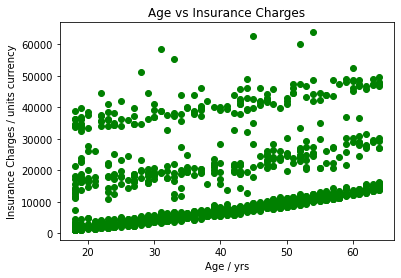

In [4]:
# Select values from all rows; only the age and the charges columns
x_age = insurance_data["age"]
y_charges = insurance_data["charges"]

# Create a labelled scatter plot using matplotlib
plt.scatter(x_age, y_charges, color = "green")
plt.xlabel("Age / yrs")
plt.ylabel("Insurance Charges / units currency")
plt.title("Age vs Insurance Charges")
plt.show()


Initial commentary: a quick glance seems to show that there is a positive linear relationship where charges increase as age does, but there is notably banding in the data, where some other influence in the columns not displayed on this graph changes the y-intercept of what seems to be around three ascending lines in the dataset. 

I will investigate this banding pattern using colour coding, at the bottom of this notebook.

### Creating simple linear regression model

In [5]:
# scikit-learn has a LinearRegression() module which is an Ordinary Least Squares Linear Regression 
# Needs to be fed an array of two dimensions
regression_model = LinearRegression()
# This would cause an error: ValueError: Expected 2D array, got 1D array instead: array=[19 18 28 ... 18 21 61].
# so don't do this: regression_model.fit(x_age,y_charges)

# This line makes an array like: array([[19],[18], etc...]) which is a 2D array:
# Fitting the model with this 2d array would cause no error
x_age_2d_array = x_age.values.reshape(-1,1) 
regression_model.fit(x_age_2d_array, y_charges)

# Make a prediction of y for every supplied value of x (age)
# This returns a 1D array because charges is the only "feature" we are aiming to predict
y_predicted_charges = regression_model.predict(x_age_2d_array)
y_predicted_charges 

array([ 8062.61476073,  7804.89214207, 10382.11832874, ...,
        7804.89214207,  8578.05999807, 18886.96474474])

### Using the regression model to make predictions on the data

If you are reading this, try it out yourself to find a predicted insurance charge for any age you like!

In [6]:
user_selected_age = int(input(f"Give an age greater than {insurance_data['age'].max()} or less than {insurance_data['age'].min()} years to predict insurance charges outside of the dataset provided."))

# Predict the unknown (as a 2D array denoted with the double square brackets) that are not found in my dataset
unknown_x_age = [[user_selected_age]]

# Append using numpy before making 2D array
x_pred = np.append(x_age, unknown_x_age).reshape(-1,1)
y_pred = regression_model.predict(x_pred)

# Avoiding printing square brackets: Access the element by getting the 0th element of the array with [0] or [0][0]
print(f"For age of {unknown_x_age[0][0]} years, insurance charges should be: {regression_model.predict(unknown_x_age)[0]:.2f} currency units.")

For age of 70 years, insurance charges should be: 21206.47 currency units.


### Graphing the scatter plot and the regression line on the same axes

Using seaborn as the package for making scatter plots this time. 

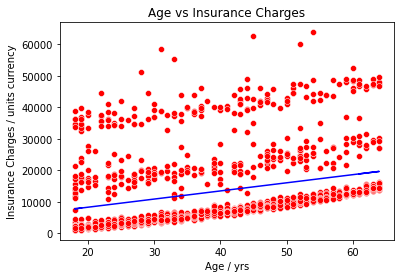

In [7]:
# Plot model and data
plt.figure()
sns.scatterplot(data=insurance_data, x="age", y="charges", color="red")
plt.plot(x_age_2d_array, y_predicted_charges, color="blue")
plt.xlabel("Age / yrs")
plt.ylabel("Insurance Charges / units currency")
plt.title("Age vs Insurance Charges")
plt.show()

### Metrics and commentary on strength/weakness of this regression model

There is a hidden assumption that people are equally spread out within each year of age. It might be better to look at age either in bins, or in a truly continuous (age in years, months, and days) range, rather than only being integers. 

Yes, we have drawn a line of best fit, but it seems unnecessary to do this without separating the clearly distinct groups of charges that we see in our scatter plots. So, read on...

# Extra: what is causing the banding?

Curiosity about other factors that cause distinctive banding led me to find useful functions within pandas to help me narrow down the causes:

In [8]:
# Deal with non-numerical values by using .get_dummies() to make categories into new binary columns (0 for no or 1 for yes, representing every category named in the text fields of the data. Make sure to ignore any free text columns to restrict the risk of ending up with too many columns due to large variability in field values in a free text column).
insurance_data_no_strings = pd.get_dummies(insurance_data)

# .corrwith() seems to be what I wanted to see, modified because it is not useful to hear that e.g. [charges]'s correlation with [charges] is 1.00 so drop [charges]
correlation_with_charges = insurance_data_no_strings.corrwith(insurance_data_no_strings["charges"]).drop("charges")

# Sort correlations and we have our biggest factors spelled out
correlation_with_charges.sort_values(ascending=False)

smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southwest   -0.043210
sex_female         -0.057292
smoker_no          -0.787251
dtype: float64

The above shows that being a smoker, being older, and having a higher BMI are the biggest factors in increasing your insurance charges.

Now to display some extra scatters to show these graphically:

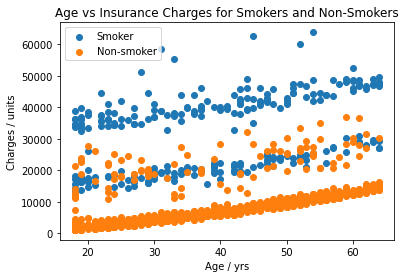

In [9]:
# Colour code, by creating two scatter plots, one for smokers and one for non-smokers. They will be given different colours automatically, but this could be explicitly specified with a color= argument in the function.
plt.scatter(insurance_data.loc[insurance_data["smoker"] == "yes", "age"], insurance_data.loc[insurance_data["smoker"] == "yes", "charges"], label="Smoker")
plt.scatter(insurance_data.loc[insurance_data["smoker"] == "no", "age"], insurance_data.loc[insurance_data["smoker"] == "no", "charges"], label="Non-smoker")

plt.xlabel("Age / yrs")
plt.ylabel("Charges / units")
plt.title("Age vs Insurance Charges for Smokers and Non-Smokers")
plt.legend()
plt.show()


We definitely see that smoking bumps up your charges. There are quite distinct areas where you ONLY find members of the non-smoking (orange band) and smoking (blue band) groups respectively. 

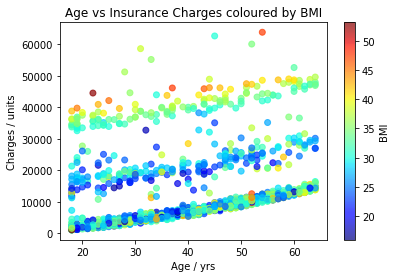

In [10]:
# Colour code, by creating one scatter plot with BMI dictating the colour
# I wanted more transparency to see overlapping data so changed alpha
# I changed the colour map to be a more vibrant colour scheme
plt.scatter(insurance_data["age"], insurance_data["charges"], c = insurance_data["bmi"], alpha = 0.7, cmap = "jet")


plt.xlabel("Age / yrs")
plt.ylabel("Charges / units")
plt.title("Age vs Insurance Charges coloured by BMI")
plt.colorbar(label="BMI")
plt.show()


This is a bit less clear, but you can see generally having a BMI closer to zero or closer to infinity is likely to make you occupy the more expensive end (y-value being higher) of the graph. If you have a BMI somewhere in the middle, you are likely to be charged a lot less. 